<a href="https://colab.research.google.com/github/lucaspinheiro27/Python_statistics/blob/main/Jupyter%20notebooks/microempreendedores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* The data set can be found through this website:
* https://www.ibge.gov.br/estatisticas/multidominio/empreendedorismo/38014-estatisticas-dos-cadastros-de-microempreendedores-individuais.html
* It contains the registries for Brazilian micro-entrepreneurs.

In [1]:
import pandas as pd
import numpy as np
from scipy.stats import trim_mean
!pip install wquantiles -q
import wquantiles
from statsmodels import robust
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
classe = pd.read_csv("/content/microempreendedores.csv", encoding='latin-1', sep=';')
classe

,Classes CNAE 2.0,Absoluto,Relativo (%)
0,Cabeleireiros e outras atividades de tratament...,1 304 187,"9,0"
1,Atividades de malote de entrega,289 160,"2,0"
2,Atividades de publicidade não especificadas an...,617 753,"4,2"
3,Serviços especializados para construção não es...,669 276,"4,6"
4,Obras de acabamento,315 284,"2,2"
5,"Fotocópias, preparação de documentos e outros ...",321 110,"2,2"
6,"Serviços de catering, bufê e outros serviços d...",500 092,"3,4"
7,Manutenção e reparação de veículos automotores,454 407,"3,1"
8,Comércio varejista de artigos do vestuário e a...,990 379,"6,8"
9,Atividades de ensino não especificadas anterio...,452 092,"3,1"


In [3]:
classe['Absoluto'] = pd.to_numeric(classe['Absoluto'].str.replace(' ', ''), errors='coerce')
classe['Relativo (%)'] = pd.to_numeric(classe['Relativo (%)'].str.replace(',', '.'), errors='coerce')

In [4]:
classe.dtypes

,0
Classes CNAE 2.0,object
Absoluto,int64
Relativo (%),float64


* Trimmed mean

$$
\text{Trimmed mean} = \bar{x} = \frac{\sum_{i=p+1}^{n-p} x_{(i)}}{n - 2p}
$$

* A trimmed mean eliminates the influence of extreme values
* The mean is bigger than the trimmed mean, which is bigger than the median
* The trimmed mean excludes the largest and the smallest classes(tim=0.1 drops 10% from each end).

* The mean is more sensitive to outliers(extreme values)
* The median, trimmed mean are less sensitive hence more robust

In [5]:
classe['Absoluto'].mean()

910478.3125

In [6]:
trim_mean(classe['Absoluto'], 0.1)

560784.0

In [7]:
classe['Absoluto'].median()

453249.5

* Computing the average of classes, we use the weighted mean or median to account for different classes

$$\text{Weighted mean} = \bar{x} = \frac{\sum_{i=k+1}^{n-k} x_i}{n-2k}$$

* Weighted mean

In [8]:
np.average(classe['Relativo (%)'], weights=classe['Absoluto'])

22.216934862465493

* Weighted median

In [9]:
wquantiles.median(classe['Relativo (%)'], weights=classe['Absoluto'])

8.630174769433523

* The variance is an average of the squared deviations

$$\text{Variance} = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2$$

* the standard deviation is the square root of the variance

* The standard deviation is much easier to interpret then the variance since is the same scale as the original data, working with squared values is much more convenient than the absolute values

$$\text{Standard Deviation} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2}$$

In [10]:
classe['Absoluto'].std()

1502910.402234044

* Common measure of variability is the difference between the 25th percentil and the 75th percentile called interquantile range(IQR)

$$\text{IQR} = Q_3 - Q_1$$

In [11]:
classe['Absoluto'].quantile(0.75) - classe['Absoluto'].quantile(0.25)

401304.5

* One way to measure variability is to take the average of the absolute values of the deviations from the mean

$$\text{Mean Absolute Deviation} = \frac{1}{n} \sum_{i=1}^{n} |x_i - \bar{x}|$$

* The variance and the squared deviations are especially sensitive to outliers since they are based on the squared deviations

* A robust estimate of variability is the median absolute deviation from the median

$$\text{MAD} = \text{median}\left(|x_i - \text{median}(x)|\right)$$

In [12]:
robust.scale.mad(classe['Absoluto'])

231643.25322153376

In [13]:
classe['Relativo (%)'].quantile([0.05, 0.25, 0.5, 0.75, 0.95])

,Relativo (%)
0.05,1.975
0.25,2.200
0.50,3.100
0.75,4.950
0.95,17.800


In [14]:
classe['Absoluto'].sum()

14567653

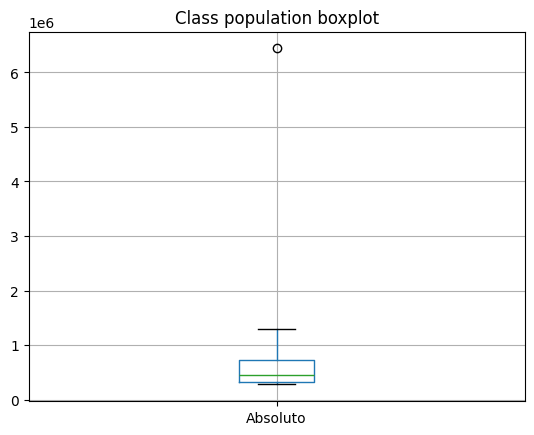

In [15]:
boxplot = classe.boxplot(column=['Absoluto'])
plt.title('Class population boxplot')
plt.show()

Text(0.5, 0, 'Class population')

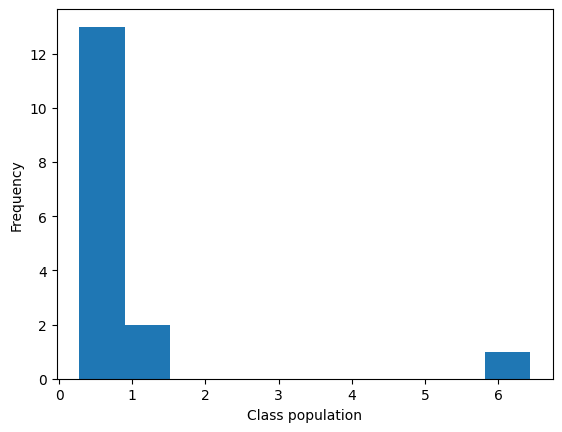

In [16]:
ax = (classe['Absoluto']/ 1_000_000).plot.hist()
ax.set_xlabel('Class population')

Text(0.5, 0, 'Relative population (per 100,000)')

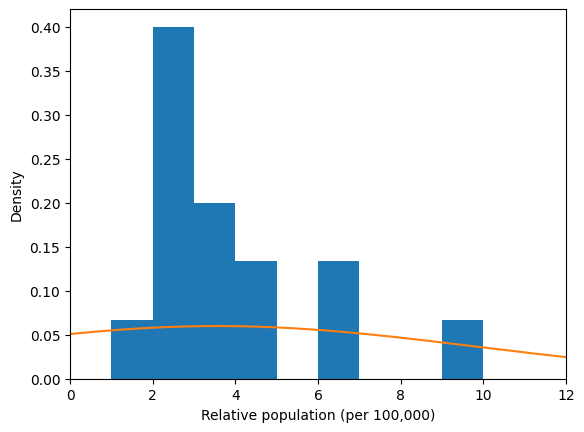

In [17]:
ax = classe['Relativo (%)'].plot.hist(density=True, xlim=[0,12], bins=range(1,12))
classe['Relativo (%)'].plot.density(ax=ax)
ax.set_xlabel('Relative population (per 100,000)')